# Introduction

in this tutorial you will learn how to build your own image classification model from scratch, if you find this tutorial helpful please upvote to me here I will appreciate that.

the main steps you should follow for any image classification model are:
* collect your image data 
* import the lbraries you will need
* remove dodgy images
* load the dataset
* data preprocessing
* build the model itself
* train the model
* plot the performance
* model evaluation
* model testing
* saving the model


# Collect your image data
if you are already have data to work with its okay skip this step but for example if you have an idea to build a model that classify people faces to happy and sad so you have to collect images which contain two catigories images with and sad faces.
in this tutorial I had an idea just for fun to make a model which identify if a girl is wearing hijab or not so I went to google and search for girls with hujab photos thin I download a zip file which cotain these images using chrome extention called [download all images](https://chrome.google.com/webstore/detail/download-all-images/ifipmflagepipjokmbdecpmjbibjnakm?hl=en).I repeat this step also to dowload images for girls without hijab, then I put these two files in one file and upload it in the kaggle notebook and done! oure data is ready now.

# Import liberaries
Import the main libraries you will need in your work to be more organized and its okay if you forgot some of them you can import them later on.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2
import imghdr

# # Remove dodgy images

let me explain why we are doing this sometimes when you go and get images from worldwide web even though they have the appropiat file extention they might not open up in python because they might be corrupted , mislabelled, mis extended or have incorect extention so we have to remove these images from our dataset

In [2]:
#lets see the data files
data='../input/image-dataset/data'
os.listdir(data)

['hijab', 'without hijab']

In [3]:
os.path.join(data,'hijab')
os.path.join(data,'without hijab')
os.listdir(os.path.join(data,'hijab'))


['france-hijab-history.jpg',
 'pexels-photo-1832326.jpeg',
 'Fathima_Thahliya.jpeg',
 'image32.png',
 'images22.jpg',
 'image23.jpeg',
 'images11.jpg',
 's.jpg',
 'depositphotos_22600361-stock-photo-muslim-woman.jpg',
 'image9.jpeg',
 'images21.jpg',
 'image21.jpeg',
 'image27.jpeg',
 'images31.jpg',
 'images33.jpg',
 'f9037076a7a2637cc38a52000cb03e0c.jpg',
 'image18.jpeg',
 'beautiful-muslim-women-hijab-illustration-vector-art-181545972.jpg',
 'WhatsApp-Image-2020-11-02-at-13.45.47-1.jpeg',
 'gorgeous-hijab-girl.jpg',
 'image14.jpeg',
 'images5.jpg',
 '15india-hijab-01-videoSixteenByNine3000.jpg',
 'hijab-as-fashion.jpg',
 'image10.jpeg',
 'image22.jpeg',
 'image12.jpeg',
 'images34.jpg',
 'illustration-of-beautiful-muslim-woman-wearing-hijab-free-vector.jpg',
 'image5.jpeg',
 'image13.jpeg',
 'swarajya2F2022-042F0bdf5caf-60a5-4284-ae6a-f648c07840632FCA37881A_E40A_4033_8FE6_96D891BE1061.jpeg',
 'image31.jpeg',
 'images6.jpg',
 'image8.jpeg',
 'hijab-1.jpg',
 'images18.jpg',
 'ladies-h

In [4]:
#create image extentions list
img_exts=['jpeg','jpg', 'bmp', 'png']

In [5]:
for image_class in os.listdir(data): 
    for image in os.listdir(os.path.join(data, image_class)):
        image_path = os.path.join(data, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image ../input/image-dataset/data/hijab/france-hijab-history.jpg
Issue with image ../input/image-dataset/data/hijab/pexels-photo-1832326.jpeg
Issue with image ../input/image-dataset/data/hijab/Fathima_Thahliya.jpeg
Issue with image ../input/image-dataset/data/hijab/image32.png
Issue with image ../input/image-dataset/data/hijab/images22.jpg
Issue with image ../input/image-dataset/data/hijab/image23.jpeg
Issue with image ../input/image-dataset/data/hijab/images11.jpg
Issue with image ../input/image-dataset/data/hijab/s.jpg
Issue with image ../input/image-dataset/data/hijab/depositphotos_22600361-stock-photo-muslim-woman.jpg
Issue with image ../input/image-dataset/data/hijab/image9.jpeg
Issue with image ../input/image-dataset/data/hijab/images21.jpg
Issue with image ../input/image-dataset/data/hijab/image21.jpeg
Issue with image ../input/image-dataset/data/hijab/image27.jpeg
Issue with image ../input/image-dataset/data/hijab/images31.jpg
Issue with image ../input/image-dataset/

libpng warning: Duplicate iCCP chunk


Issue with image ../input/image-dataset/data/without hijab/cz9yyq96zcsi2lldgm8d_09353745-941b-4bc8-887a-18a3c9fdf546.png
Issue with image ../input/image-dataset/data/without hijab/images209.jpg
Issue with image ../input/image-dataset/data/without hijab/slider_home_new4.jpg
Issue with image ../input/image-dataset/data/without hijab/summer-transformative-wellness-products-the-everygirl-feature-474x316.png
Issue with image ../input/image-dataset/data/without hijab/image14.jpeg
Issue with image ../input/image-dataset/data/without hijab/images168.jpg
Issue with image ../input/image-dataset/data/without hijab/63f7e99d2bdb21c005ce2debca4c3a9e.jpg
Issue with image ../input/image-dataset/data/without hijab/images117.jpg
Issue with image ../input/image-dataset/data/without hijab/images5.jpg
Issue with image ../input/image-dataset/data/without hijab/photo-1571837360114-edf5dba7b1dd.jpeg
Issue with image ../input/image-dataset/data/without hijab/images222.jpg
Issue with image ../input/image-datase

# # load data

In [6]:
#this line of code allow label the data and prepare it
dataset=tf.keras.utils.image_dataset_from_directory(data)

Found 450 files belonging to 2 classes.


2022-07-27 03:29:31.367410: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-27 03:29:31.517743: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-27 03:29:31.518800: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-27 03:29:31.524615: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [7]:
data_iterator=dataset.as_numpy_iterator()

In [8]:
batch=data_iterator.next()

2022-07-27 03:29:34.133189: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
Cleanup called...
Cleanup called...


In [9]:
#images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [10]:
#images represented as labels
batch[1]


array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0], dtype=int32)

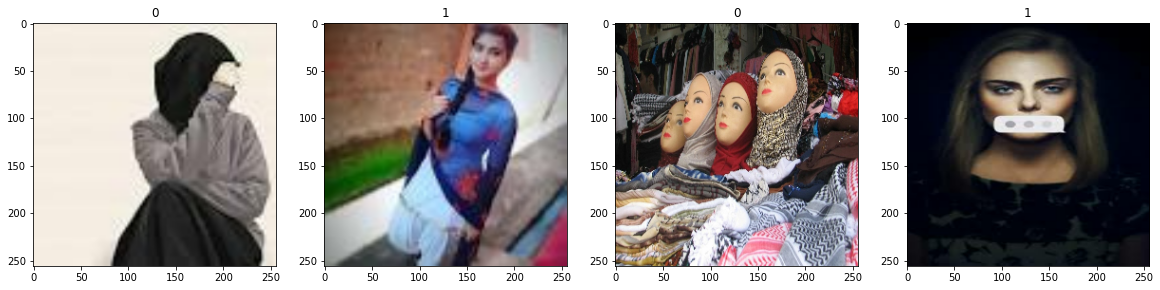

In [11]:
#lets check what label belong to each class of images
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# # preprocess data

# # # scale data

In [12]:
#scale the data to range 0and 1 rather than zero and 255
dataset_1=dataset.map(lambda x,y:(x/255,y))

In [13]:
scaled_iterator=dataset_1.as_numpy_iterator()

In [14]:
BATCH=scaled_iterator.next()

Cleanup called...
Cleanup called...


In [15]:
BATCH[1]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0], dtype=int32)

Cleanup called...


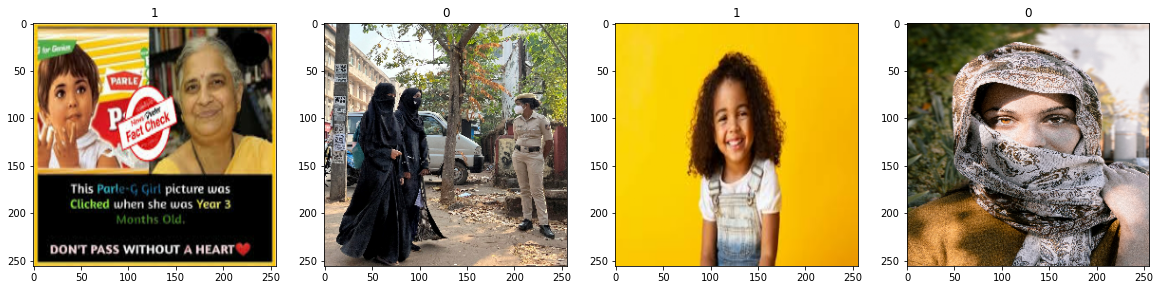

In [16]:
#show the scaled images sample
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(BATCH[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(BATCH[1][idx])

# # # split data

In [17]:
len(dataset_1)

15

In [18]:
train_size = int(len(dataset_1)*.7)
val_size = int(len(dataset_1)*.2)
test_size = int(len(dataset_1)*.1)+1

In [19]:
#test_size
train_size
#val_size

10

In [20]:
train = dataset_1.take(train_size)
val = dataset_1.skip(train_size).take(val_size)
test = dataset_1.skip(train_size+val_size).take(test_size)

# # Build the model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [22]:
model = Sequential([
    layers.Conv2D(16,3, activation='relu', input_shape=(256,256,3)),
    layers.MaxPool2D(),
    layers.Conv2D(32,3, activation='relu', input_shape=(256,256,3)),
    layers.MaxPool2D(),
    layers.Conv2D(16,3, activation='relu', input_shape=(256,256,3)),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(256,activation='relu'),
        layers.Dense(1,activation='sigmoid')

    
    
    
    
    
])

In [23]:
'''model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))'''

"model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))\nmodel.add(MaxPooling2D())\nmodel.add(Conv2D(32, (3,3), 1, activation='relu'))\nmodel.add(MaxPooling2D())\nmodel.add(Conv2D(16, (3,3), 1, activation='relu'))\nmodel.add(MaxPooling2D())\nmodel.add(Flatten())\nmodel.add(Dense(256, activation='relu'))\nmodel.add(Dense(1, activation='sigmoid'))"

In [24]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 14400)             0

# # Train the model

In [26]:
logdir='logs'

In [27]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

2022-07-27 03:29:39.893531: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-07-27 03:29:39.893570: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-07-27 03:29:39.895654: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1614] Profiler found 1 GPUs
2022-07-27 03:29:40.078875: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-07-27 03:29:40.079074: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


In [28]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


Cleanup called...
Cleanup called...
Cleanup called...
2022-07-27 03:29:44.248785: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


 1/10 [==>...........................] - ETA: 1:31 - loss: 0.6886 - accuracy: 0.5625

2022-07-27 03:29:50.407244: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-07-27 03:29:50.407290: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


 2/10 [=====>........................] - ETA: 2s - loss: 1.1522 - accuracy: 0.5938  

2022-07-27 03:29:50.721434: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-07-27 03:29:50.721885: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
Cleanup called...
2022-07-27 03:29:50.866151: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-27 03:29:50.866218: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: too many profiles
2022-07-27 03:29:50.882585: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 143 callback api events and 140 activity events. 
2022-07-27 03:29:50.891308: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-07-27 03:29:50.907906: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/train/plugins/profile/2022_07_27_03_29_50

2022-07-27 03:29:50.913419: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dum

 5/10 [==============>...............] - ETA: 0s - loss: 1.1020 - accuracy: 0.4625

2022-07-27 03:29:50.937907: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/train/plugins/profile/2022_07_27_03_29_50

2022-07-27 03:29:50.940136: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to logs/train/plugins/profile/2022_07_27_03_29_50/cc8256abb699.memory_profile.json.gz
2022-07-27 03:29:50.940867: I tensorflow/core/profiler/rpc/client/capture_profile.cc:251] Creating directory: logs/train/plugins/profile/2022_07_27_03_29_50
Dumped tool data for xplane.pb to logs/train/plugins/profile/2022_07_27_03_29_50/cc8256abb699.xplane.pb
Dumped tool data for overview_page.pb to logs/train/plugins/profile/2022_07_27_03_29_50/cc8256abb699.overview_page.pb
Dumped tool data for input_pipeline.pb to logs/train/plugins/profile/2022_07_27_03_29_50/cc8256abb699.input_pipeline.pb
Dumped tool data for tensorflow_stats.pb to logs/train/plugins/profile/2022_07_27_03_29_50/cc8256abb699.tensorflow_stats.

 9/10 [==========================>...] - ETA: 0s - loss: 0.8813 - accuracy: 0.5694

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
2022-07-27 03:29:54.021897: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-27 03:29:54.024284: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: too many profiles
Cleanup called...
Cleanup called...
Cleanup called...


10/10 [==============================] - 16s 686ms/step - loss: 0.8558 - accuracy: 0.5844 - val_loss: 0.6267 - val_accuracy: 0.6667
Epoch 2/20


Cleanup called...
Cleanup called...


 3/10 [========>.....................] - ETA: 2s - loss: 0.6633 - accuracy: 0.6146

Cleanup called...
Cleanup called...


 4/10 [===========>..................] - ETA: 1s - loss: 0.6379 - accuracy: 0.6484

2022-07-27 03:30:03.992988: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-27 03:30:03.993053: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: too many profiles
Cleanup called...


 5/10 [==============>...............] - ETA: 1s - loss: 0.6381 - accuracy: 0.6500

Cleanup called...
Cleanup called...


10/10 [==============================] - ETA: 0s - loss: 0.6125 - accuracy: 0.6781

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
2022-07-27 03:30:08.171421: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-27 03:30:08.171756: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: too many profiles
Cleanup called...
Cleanup called...
Cleanup called...


10/10 [==============================] - 9s 734ms/step - loss: 0.6125 - accuracy: 0.6781 - val_loss: 0.5437 - val_accuracy: 0.7292
Epoch 3/20


Cleanup called...
Cleanup called...


 4/10 [===========>..................] - ETA: 1s - loss: 0.6184 - accuracy: 0.6719

Cleanup called...
Cleanup called...
2022-07-27 03:30:12.357589: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-27 03:30:12.357655: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: too many profiles


 5/10 [==============>...............] - ETA: 1s - loss: 0.6181 - accuracy: 0.6812

Cleanup called...
Cleanup called...
Cleanup called...


 9/10 [==========================>...] - ETA: 0s - loss: 0.5884 - accuracy: 0.7118

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
2022-07-27 03:30:15.964509: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-27 03:30:15.964655: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: too many profiles
Cleanup called...
Cleanup called...
Cleanup called...


10/10 [==============================] - 8s 688ms/step - loss: 0.6240 - accuracy: 0.7000 - val_loss: 0.4804 - val_accuracy: 0.7396
Epoch 4/20


Cleanup called...
Cleanup called...


 4/10 [===========>..................] - ETA: 1s - loss: 0.5778 - accuracy: 0.7734

Cleanup called...
Cleanup called...
2022-07-27 03:30:22.610858: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-27 03:30:22.611211: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: too many profiles


 5/10 [==============>...............] - ETA: 1s - loss: 0.5884 - accuracy: 0.7812

Cleanup called...
Cleanup called...
Cleanup called...


 8/10 [=======================>......] - ETA: 0s - loss: 0.5943 - accuracy: 0.7773

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
2022-07-27 03:30:25.587481: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-27 03:30:25.587618: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: too many profiles
Cleanup called...
Cleanup called...
Cleanup called...


10/10 [==============================] - 8s 690ms/step - loss: 0.5745 - accuracy: 0.7812 - val_loss: 0.5244 - val_accuracy: 0.7917
Epoch 5/20


Cleanup called...
Cleanup called...


 4/10 [===========>..................] - ETA: 1s - loss: 0.5425 - accuracy: 0.7344

Cleanup called...
Cleanup called...
2022-07-27 03:30:30.627745: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-27 03:30:30.627839: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: too many profiles


 5/10 [==============>...............] - ETA: 1s - loss: 0.5523 - accuracy: 0.7312

Cleanup called...
Cleanup called...
Cleanup called...


 9/10 [==========================>...] - ETA: 0s - loss: 0.5119 - accuracy: 0.7743

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
2022-07-27 03:30:33.567591: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-27 03:30:33.567661: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: too many profiles
Cleanup called...
Cleanup called...
Cleanup called...


10/10 [==============================] - 8s 686ms/step - loss: 0.5099 - accuracy: 0.7781 - val_loss: 0.5906 - val_accuracy: 0.7188
Epoch 6/20


Cleanup called...
Cleanup called...


 3/10 [========>.....................] - ETA: 1s - loss: 0.6643 - accuracy: 0.7396

Cleanup called...
Cleanup called...
2022-07-27 03:30:41.076285: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-27 03:30:41.076355: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: too many profiles


 5/10 [==============>...............] - ETA: 1s - loss: 0.5946 - accuracy: 0.7625

Cleanup called...
Cleanup called...
Cleanup called...


 9/10 [==========================>...] - ETA: 0s - loss: 0.5272 - accuracy: 0.8090

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
2022-07-27 03:30:44.201994: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-27 03:30:44.202169: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: too many profiles
Cleanup called...
Cleanup called...
Cleanup called...


10/10 [==============================] - 8s 693ms/step - loss: 0.5155 - accuracy: 0.8156 - val_loss: 0.5042 - val_accuracy: 0.7292
Epoch 7/20


Cleanup called...
Cleanup called...


 4/10 [===========>..................] - ETA: 1s - loss: 0.4394 - accuracy: 0.7969

Cleanup called...
Cleanup called...
2022-07-27 03:30:51.363192: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-27 03:30:51.365114: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: too many profiles


 5/10 [==============>...............] - ETA: 1s - loss: 0.4057 - accuracy: 0.8125

Cleanup called...
Cleanup called...
Cleanup called...


 9/10 [==========================>...] - ETA: 0s - loss: 0.4214 - accuracy: 0.8264

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
2022-07-27 03:30:54.371726: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-27 03:30:54.372162: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: too many profiles
Cleanup called...
Cleanup called...
Cleanup called...


10/10 [==============================] - 6s 449ms/step - loss: 0.4159 - accuracy: 0.8375 - val_loss: 0.3970 - val_accuracy: 0.8750
Epoch 8/20


Cleanup called...
Cleanup called...


 4/10 [===========>..................] - ETA: 1s - loss: 0.3995 - accuracy: 0.8438

Cleanup called...
Cleanup called...
2022-07-27 03:30:57.521284: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-27 03:30:57.521671: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: too many profiles


 5/10 [==============>...............] - ETA: 1s - loss: 0.3898 - accuracy: 0.8438

Cleanup called...
Cleanup called...
Cleanup called...


10/10 [==============================] - ETA: 0s - loss: 0.3517 - accuracy: 0.8594

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
2022-07-27 03:31:00.910734: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-27 03:31:00.910795: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: too many profiles
Cleanup called...
Cleanup called...
Cleanup called...


10/10 [==============================] - 8s 699ms/step - loss: 0.3517 - accuracy: 0.8594 - val_loss: 0.4161 - val_accuracy: 0.8021
Epoch 9/20


Cleanup called...
Cleanup called...


 3/10 [========>.....................] - ETA: 2s - loss: 0.6363 - accuracy: 0.6875

Cleanup called...
Cleanup called...
2022-07-27 03:31:07.777961: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-27 03:31:07.781905: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: too many profiles


 5/10 [==============>...............] - ETA: 1s - loss: 0.6224 - accuracy: 0.6812

Cleanup called...
Cleanup called...
Cleanup called...


10/10 [==============================] - ETA: 0s - loss: 0.4725 - accuracy: 0.7781

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
2022-07-27 03:31:10.844122: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-27 03:31:10.844198: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: too many profiles
Cleanup called...
Cleanup called...
Cleanup called...


10/10 [==============================] - 8s 701ms/step - loss: 0.4725 - accuracy: 0.7781 - val_loss: 0.2906 - val_accuracy: 0.9167
Epoch 10/20


Cleanup called...
Cleanup called...


 3/10 [========>.....................] - ETA: 1s - loss: 0.3232 - accuracy: 0.8646

Cleanup called...
Cleanup called...


 5/10 [==============>...............] - ETA: 1s - loss: 0.3292 - accuracy: 0.8750

2022-07-27 03:31:17.781095: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-27 03:31:17.781170: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: too many profiles
Cleanup called...
Cleanup called...
Cleanup called...


 9/10 [==========================>...] - ETA: 0s - loss: 0.3285 - accuracy: 0.8715

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
2022-07-27 03:31:21.237385: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-27 03:31:21.237727: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: too many profiles
Cleanup called...
Cleanup called...
Cleanup called...


10/10 [==============================] - 8s 693ms/step - loss: 0.3192 - accuracy: 0.8813 - val_loss: 0.1976 - val_accuracy: 0.9688
Epoch 11/20


Cleanup called...
Cleanup called...


 4/10 [===========>..................] - ETA: 1s - loss: 0.2456 - accuracy: 0.9141

Cleanup called...
Cleanup called...
2022-07-27 03:31:25.918991: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-27 03:31:25.919152: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: too many profiles


 5/10 [==============>...............] - ETA: 1s - loss: 0.2315 - accuracy: 0.9125

Cleanup called...
Cleanup called...
Cleanup called...


 9/10 [==========================>...] - ETA: 0s - loss: 0.2405 - accuracy: 0.9028

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
2022-07-27 03:31:28.996495: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-27 03:31:28.996637: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: too many profiles
Cleanup called...
Cleanup called...
Cleanup called...


10/10 [==============================] - 8s 690ms/step - loss: 0.2386 - accuracy: 0.9000 - val_loss: 0.2148 - val_accuracy: 0.9271
Epoch 12/20


Cleanup called...
Cleanup called...


 4/10 [===========>..................] - ETA: 1s - loss: 0.1619 - accuracy: 0.9531

Cleanup called...
Cleanup called...
2022-07-27 03:31:36.256019: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-27 03:31:36.256087: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: too many profiles


 5/10 [==============>...............] - ETA: 1s - loss: 0.1594 - accuracy: 0.9563

Cleanup called...
Cleanup called...
Cleanup called...


 9/10 [==========================>...] - ETA: 0s - loss: 0.1980 - accuracy: 0.9306

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
2022-07-27 03:31:39.314077: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-27 03:31:39.314151: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: too many profiles
Cleanup called...
Cleanup called...
Cleanup called...


10/10 [==============================] - 8s 693ms/step - loss: 0.1931 - accuracy: 0.9375 - val_loss: 0.2223 - val_accuracy: 0.9167
Epoch 13/20


Cleanup called...
Cleanup called...


 3/10 [========>.....................] - ETA: 1s - loss: 0.2045 - accuracy: 0.9375

Cleanup called...
Cleanup called...


 4/10 [===========>..................] - ETA: 1s - loss: 0.1960 - accuracy: 0.9375

2022-07-27 03:31:46.511506: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-27 03:31:46.511566: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: too many profiles
Cleanup called...


 6/10 [=================>............] - ETA: 0s - loss: 0.2070 - accuracy: 0.9375

Cleanup called...
Cleanup called...


 9/10 [==========================>...] - ETA: 0s - loss: 0.2034 - accuracy: 0.9444

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
2022-07-27 03:31:49.719323: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-27 03:31:49.719695: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: too many profiles
Cleanup called...
Cleanup called...
Cleanup called...


10/10 [==============================] - 8s 698ms/step - loss: 0.1957 - accuracy: 0.9500 - val_loss: 0.1326 - val_accuracy: 0.9688
Epoch 14/20


Cleanup called...
Cleanup called...


 3/10 [========>.....................] - ETA: 2s - loss: 0.1106 - accuracy: 0.9688

Cleanup called...
Cleanup called...
2022-07-27 03:31:56.904783: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-27 03:31:56.905189: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: too many profiles


 5/10 [==============>...............] - ETA: 1s - loss: 0.1212 - accuracy: 0.9688

Cleanup called...
Cleanup called...
Cleanup called...


 9/10 [==========================>...] - ETA: 0s - loss: 0.1096 - accuracy: 0.9722

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
2022-07-27 03:32:00.011594: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-27 03:32:00.012005: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: too many profiles
Cleanup called...
Cleanup called...
Cleanup called...


10/10 [==============================] - 8s 696ms/step - loss: 0.1227 - accuracy: 0.9625 - val_loss: 0.0908 - val_accuracy: 0.9583
Epoch 15/20


Cleanup called...
Cleanup called...


 4/10 [===========>..................] - ETA: 1s - loss: 0.0942 - accuracy: 0.9688

Cleanup called...
Cleanup called...
2022-07-27 03:32:07.296111: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-27 03:32:07.296177: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: too many profiles


 5/10 [==============>...............] - ETA: 1s - loss: 0.0935 - accuracy: 0.9750

Cleanup called...
Cleanup called...
Cleanup called...


 9/10 [==========================>...] - ETA: 0s - loss: 0.0957 - accuracy: 0.9826

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
2022-07-27 03:32:10.484492: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-27 03:32:10.484911: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: too many profiles
Cleanup called...
Cleanup called...
Cleanup called...


10/10 [==============================] - 7s 477ms/step - loss: 0.0961 - accuracy: 0.9812 - val_loss: 0.0704 - val_accuracy: 0.9792
Epoch 16/20


Cleanup called...
Cleanup called...


 3/10 [========>.....................] - ETA: 3s - loss: 0.0734 - accuracy: 0.9688

Cleanup called...
Cleanup called...


 4/10 [===========>..................] - ETA: 2s - loss: 0.0665 - accuracy: 0.9688

2022-07-27 03:32:17.556856: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-27 03:32:17.556935: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: too many profiles
Cleanup called...


 6/10 [=================>............] - ETA: 1s - loss: 0.0575 - accuracy: 0.9792

Cleanup called...
Cleanup called...


10/10 [==============================] - ETA: 0s - loss: 0.0619 - accuracy: 0.9812

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
2022-07-27 03:32:20.974083: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-27 03:32:20.974333: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: too many profiles
Cleanup called...
Cleanup called...
Cleanup called...


10/10 [==============================] - 7s 539ms/step - loss: 0.0619 - accuracy: 0.9812 - val_loss: 0.0347 - val_accuracy: 1.0000
Epoch 17/20


Cleanup called...
Cleanup called...


 3/10 [========>.....................] - ETA: 2s - loss: 0.0503 - accuracy: 0.9792

Cleanup called...
Cleanup called...


 5/10 [==============>...............] - ETA: 1s - loss: 0.0393 - accuracy: 0.9875

2022-07-27 03:32:28.304134: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-27 03:32:28.305880: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: too many profiles
Cleanup called...


 6/10 [=================>............] - ETA: 1s - loss: 0.0352 - accuracy: 0.9896

Cleanup called...
Cleanup called...


 9/10 [==========================>...] - ETA: 0s - loss: 0.0318 - accuracy: 0.9931

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
2022-07-27 03:32:31.452431: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-27 03:32:31.452602: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: too many profiles
Cleanup called...
Cleanup called...
Cleanup called...


10/10 [==============================] - 9s 726ms/step - loss: 0.0351 - accuracy: 0.9906 - val_loss: 0.0356 - val_accuracy: 0.9896
Epoch 18/20


Cleanup called...
Cleanup called...


 3/10 [========>.....................] - ETA: 2s - loss: 0.0201 - accuracy: 1.0000

Cleanup called...
Cleanup called...


 4/10 [===========>..................] - ETA: 1s - loss: 0.0219 - accuracy: 1.0000

2022-07-27 03:32:36.674206: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-27 03:32:36.678521: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: too many profiles
Cleanup called...


 6/10 [=================>............] - ETA: 0s - loss: 0.0231 - accuracy: 1.0000

Cleanup called...
Cleanup called...


 9/10 [==========================>...] - ETA: 0s - loss: 0.0235 - accuracy: 1.0000

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
2022-07-27 03:32:40.131057: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-27 03:32:40.131127: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: too many profiles
Cleanup called...
Cleanup called...
Cleanup called...


10/10 [==============================] - 8s 700ms/step - loss: 0.0231 - accuracy: 1.0000 - val_loss: 0.0242 - val_accuracy: 0.9896
Epoch 19/20


Cleanup called...
Cleanup called...


 3/10 [========>.....................] - ETA: 2s - loss: 0.0176 - accuracy: 1.0000

Cleanup called...
Cleanup called...


 4/10 [===========>..................] - ETA: 1s - loss: 0.0253 - accuracy: 1.0000

2022-07-27 03:32:46.852153: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-27 03:32:46.852217: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: too many profiles
Cleanup called...
Cleanup called...


 8/10 [=======================>......] - ETA: 0s - loss: 0.0332 - accuracy: 0.9961

Cleanup called...


10/10 [==============================] - ETA: 0s - loss: 0.0299 - accuracy: 0.9969

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
2022-07-27 03:32:50.030106: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-27 03:32:50.030181: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: too many profiles
Cleanup called...
Cleanup called...
Cleanup called...


10/10 [==============================] - 8s 700ms/step - loss: 0.0299 - accuracy: 0.9969 - val_loss: 0.0096 - val_accuracy: 1.0000
Epoch 20/20


Cleanup called...
Cleanup called...


 3/10 [========>.....................] - ETA: 2s - loss: 0.0282 - accuracy: 0.9896

Cleanup called...
Cleanup called...
2022-07-27 03:32:55.174373: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-27 03:32:55.174641: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: too many profiles


 5/10 [==============>...............] - ETA: 1s - loss: 0.0263 - accuracy: 0.9937

Cleanup called...
Cleanup called...
Cleanup called...


 9/10 [==========================>...] - ETA: 0s - loss: 0.0207 - accuracy: 0.9965

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
2022-07-27 03:32:58.329641: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-27 03:32:58.329712: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: too many profiles
Cleanup called...
Cleanup called...
Cleanup called...


10/10 [==============================] - 8s 697ms/step - loss: 0.0190 - accuracy: 0.9969 - val_loss: 0.0057 - val_accuracy: 1.0000


# # Plot the performance

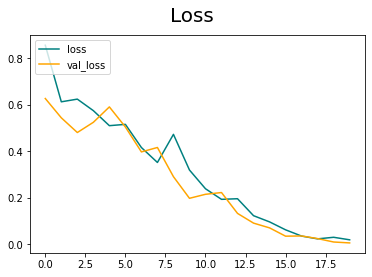

In [29]:
#plot the loss
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

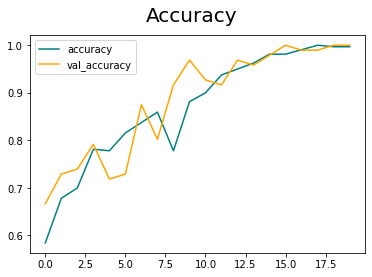

In [30]:
#plot the accuracy
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# # Evaluate the model

In [31]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [32]:
#apply the evaluation metrics on test set
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
print(pre.result(), re.result(), acc.result())


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
2022-07-27 03:33:05.852404: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2022-07-27 03:33:05.852760: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: too many profiles
Cleanup called...
Cleanup called...
Cleanup called...


tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# # Test the model

lets test the model by uploading two images one with hijab and one without hijab and see if the model can recognize them right

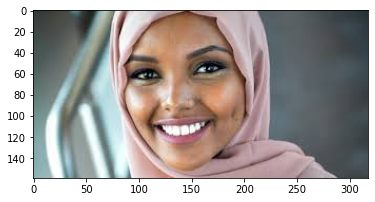

In [33]:
#download any image from google and upload it 
hijab_image = cv2.imread('../input/testset/testimages/withhijab.jpg')
plt.imshow(cv2.cvtColor(hijab_image,cv2.COLOR_BGR2RGB))
plt.show()

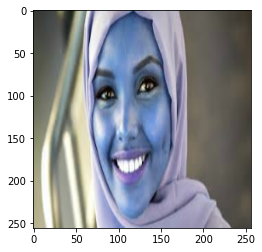

In [34]:
#resize the image
resized_hijab_image = tf.image.resize(hijab_image, (256,256))
plt.imshow(resized_hijab_image.numpy().astype(int))
plt.show()

In [35]:
#apply the model on the image
y_pred = model.predict(np.expand_dims(resized_hijab_image/255, 0))

In [36]:
if y_pred > 0.5: 
    print(f'Predicted class is girl without hijab')
else:
    print(f'Predicted class is girl with hijab')

Predicted class is girl with hijab


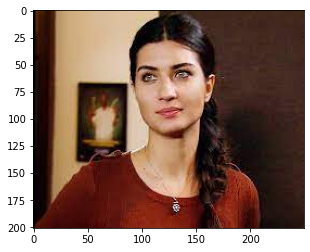

In [37]:
#download any image from google and upload it 
wthout_hijab_image = cv2.imread('../input/testset/testimages/withouthijab.jpg')
plt.imshow(cv2.cvtColor(wthout_hijab_image,cv2.COLOR_BGR2RGB))
plt.show()

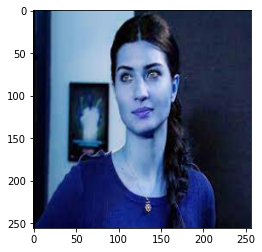

In [38]:
#resize the image
resized_wthout_hijab_image = tf.image.resize(wthout_hijab_image, (256,256))
plt.imshow(resized_wthout_hijab_image.numpy().astype(int))
plt.show()

In [39]:
#apply the model on the image
y_pred = model.predict(np.expand_dims(resized_wthout_hijab_image/255, 0))

In [40]:
if y_pred > 0.5: 
    print(f'Predicted class is girl without hijab')
else:
    print(f'Predicted class is girl with hijab')

Predicted class is girl with hijab


# # Finally save the model

In [41]:
from tensorflow.keras.models import load_model
model.save('classifier model')


2022-07-27 03:33:08.023097: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


In [42]:
new_model = load_model('classifier model')
new_model.predict(np.expand_dims(resized_wthout_hijab_image/255, 0))


array([[0.31232953]], dtype=float32)